In [1]:
pip install deflateBR

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import zipfile
import os
import pandas as pd
import deflatebr as dbr

In [3]:
def concatenar_csvs(diretorio):
    frames = []

    for arquivo in os.listdir(diretorio):
        if arquivo.endswith('.csv'):
            caminho_arquivo = os.path.join(diretorio, arquivo)
            
            df = pd.read_csv(caminho_arquivo, encoding='utf-8', delimiter=";", decimal=",")
            df = df.rename(columns={df.columns[0]: "data_base"})
            df['data_base'] = pd.to_datetime(df['data_base'], format="%Y-%m-%d")
            df['mes'] = df['data_base'].dt.month 
            df['ano'] = df['data_base'].dt.year
            #Filtros:
            df = df[df['mes'] == 12] 
            df = df[df['modalidade'] == "PJ - Capital de giro"]
            df['porte'] = df['porte'].str.replace(' ','')
            df = df[df['porte'] == "PJ-Micro"]
            df = df[['data_base', 'modalidade', 'porte', 'a_vencer_ate_90_dias','a_vencer_de_91_ate_360_dias', 'ativo_problematico']]        
            df['curto_prazo'] = df['a_vencer_ate_90_dias'] + df['a_vencer_de_91_ate_360_dias']
            df = df.drop(columns = ['a_vencer_ate_90_dias', 'a_vencer_de_91_ate_360_dias'], axis = 1)
            df['data_base'] = df['data_base'].dt.strftime('%Y-%m')
            #Agrupamentos para análise
            df = df.groupby(['data_base', 'modalidade', 'porte']).agg({
                'curto_prazo': 'sum',
                'ativo_problematico': 'sum'
            }).reset_index()
            
            frames.append(df)

    df_concatenado = pd.concat(frames, ignore_index=True)

    return df_concatenado

In [4]:
anos = list(range(2012, 2023))
dataframes = []

for ano in anos:
    diretorio = f"planilha_{ano}"
    dataframe_ano = concatenar_csvs(diretorio)
    dataframes.append(dataframe_ano)

df_total_micro = pd.concat(dataframes, ignore_index=False)

In [5]:
df_total_micro['data_base']=pd.to_datetime(df_total_micro['data_base'], format='%Y-%m')

In [6]:
df_total_micro['curto_prazo_deflacionado'] = dbr.deflate(nominal_values=df_total_micro['curto_prazo'], nominal_dates=df_total_micro['data_base'], real_date='2022-12')

C:\Users\Casa\AppData\Local\Programs\Python\Python311\Lib\site-packages\deflatebr\deflate.py:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['deflated'] = df[['nom_values', 'VALVALOR']].apply(lambda x: ((real_indx/x[1]) * x[0])[0], axis=1)


In [7]:
df_total_micro['ativo_problematico_deflacionado'] = dbr.deflate(nominal_values=df_total_micro['ativo_problematico'], nominal_dates=df_total_micro['data_base'], real_date='2022-12')

C:\Users\Casa\AppData\Local\Programs\Python\Python311\Lib\site-packages\deflatebr\deflate.py:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['deflated'] = df[['nom_values', 'VALVALOR']].apply(lambda x: ((real_indx/x[1]) * x[0])[0], axis=1)


In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_total_micro.head(3)

,data_base,modalidade,porte,curto_prazo,ativo_problematico,curto_prazo_deflacionado,ativo_problematico_deflacionado
0,2012-12-01,PJ - Capital de giro,PJ-Micro,22548500608.78,2602432205.93,40842763541.78,4713862134.98
0,2013-12-01,PJ - Capital de giro,PJ-Micro,21878738562.46,2426556026.46,37466155604.48,4155345858.30
0,2014-12-01,PJ - Capital de giro,PJ-Micro,19922616816.46,2904117506.98,32017558733.72,4667195765.80


In [9]:
def concatenar_csvs(diretorio):
    frames = []

    for arquivo in os.listdir(diretorio):
        if arquivo.endswith('.csv'):
            caminho_arquivo = os.path.join(diretorio, arquivo)
            
            df = pd.read_csv(caminho_arquivo, encoding='utf-8', delimiter=";", decimal=",")
            df = df.rename(columns={df.columns[0]: "data_base"})
            df['data_base'] = pd.to_datetime(df['data_base'], format="%Y-%m-%d")
            df['mes'] = df['data_base'].dt.month 
            df['ano'] = df['data_base'].dt.year
            #Filtros:
            df = df[df['mes'] == 12] 
            df = df[df['modalidade'] == "PJ - Capital de giro"]
            df['porte'] = df['porte'].str.replace(' ','')
            df = df[df['porte'] == "PJ-Pequeno"]
            df = df[['data_base', 'modalidade', 'porte', 'a_vencer_ate_90_dias','a_vencer_de_91_ate_360_dias', 'ativo_problematico']]        
            df['curto_prazo'] = df['a_vencer_ate_90_dias'] + df['a_vencer_de_91_ate_360_dias']
            df = df.drop(columns = ['a_vencer_ate_90_dias', 'a_vencer_de_91_ate_360_dias'], axis = 1)
            df['data_base'] = df['data_base'].dt.strftime('%Y-%m')
            #Agrupamentos para análise
            df = df.groupby(['data_base', 'modalidade', 'porte']).agg({
                'curto_prazo': 'sum',
                'ativo_problematico': 'sum'
            }).reset_index()
            
            frames.append(df)

    df_concatenado = pd.concat(frames, ignore_index=True)

    return df_concatenado

In [10]:
anos = list(range(2012, 2023))
dataframes = []

for ano in anos:
    diretorio = f"planilha_{ano}"
    dataframe_ano = concatenar_csvs(diretorio)
    dataframes.append(dataframe_ano)

df_total_pequeno = pd.concat(dataframes, ignore_index=False)

In [11]:
df_total_pequeno['data_base']=pd.to_datetime(df_total_pequeno['data_base'], format='%Y-%m')

In [12]:
df_total_pequeno['curto_prazo_deflacionado'] = dbr.deflate(nominal_values=df_total_pequeno['curto_prazo'], nominal_dates=df_total_pequeno['data_base'], real_date='2022-12')

C:\Users\Casa\AppData\Local\Programs\Python\Python311\Lib\site-packages\deflatebr\deflate.py:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['deflated'] = df[['nom_values', 'VALVALOR']].apply(lambda x: ((real_indx/x[1]) * x[0])[0], axis=1)


In [13]:
df_total_pequeno['ativo_problematico_deflacionado'] = dbr.deflate(nominal_values=df_total_pequeno['ativo_problematico'], nominal_dates=df_total_micro['data_base'], real_date='2022-12')

C:\Users\Casa\AppData\Local\Programs\Python\Python311\Lib\site-packages\deflatebr\deflate.py:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['deflated'] = df[['nom_values', 'VALVALOR']].apply(lambda x: ((real_indx/x[1]) * x[0])[0], axis=1)


In [14]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_total_pequeno.head(3)

,data_base,modalidade,porte,curto_prazo,ativo_problematico,curto_prazo_deflacionado,ativo_problematico_deflacionado
0,2012-12-01,PJ - Capital de giro,PJ-Pequeno,33262395494.99,5669600039.11,60249157032.91,10269513604.98
0,2013-12-01,PJ - Capital de giro,PJ-Pequeno,35310742784.29,5363051095.45,60467735828.97,9183934726.55
0,2014-12-01,PJ - Capital de giro,PJ-Pequeno,38681842693.32,6257899906.38,62165436487.18,10057046202.72


In [15]:
df_total_micro.to_csv("analise_pj_micro_problematico_x_capital.csv")

In [16]:
df_total_pequeno.to_csv("analise_pj_pequeno_problematico_x_capital.csv")

In [17]:
df_total_micro.columns

Index(['data_base', 'modalidade', 'porte', 'curto_prazo', 'ativo_problematico',
       'curto_prazo_deflacionado', 'ativo_problematico_deflacionado'],
      dtype='object')

In [18]:
df_total_pequeno.columns

Index(['data_base', 'modalidade', 'porte', 'curto_prazo', 'ativo_problematico',
       'curto_prazo_deflacionado', 'ativo_problematico_deflacionado'],
      dtype='object')

In [19]:
df_total_micro.head(3)

,data_base,modalidade,porte,curto_prazo,ativo_problematico,curto_prazo_deflacionado,ativo_problematico_deflacionado
0,2012-12-01,PJ - Capital de giro,PJ-Micro,22548500608.78,2602432205.93,40842763541.78,4713862134.98
0,2013-12-01,PJ - Capital de giro,PJ-Micro,21878738562.46,2426556026.46,37466155604.48,4155345858.30
0,2014-12-01,PJ - Capital de giro,PJ-Micro,19922616816.46,2904117506.98,32017558733.72,4667195765.80


In [20]:
df_total_pequeno.head(3)

,data_base,modalidade,porte,curto_prazo,ativo_problematico,curto_prazo_deflacionado,ativo_problematico_deflacionado
0,2012-12-01,PJ - Capital de giro,PJ-Pequeno,33262395494.99,5669600039.11,60249157032.91,10269513604.98
0,2013-12-01,PJ - Capital de giro,PJ-Pequeno,35310742784.29,5363051095.45,60467735828.97,9183934726.55
0,2014-12-01,PJ - Capital de giro,PJ-Pequeno,38681842693.32,6257899906.38,62165436487.18,10057046202.72


In [21]:
import plotly.express as px

A análise do endividamento das Micro e Pequenas Empresas brasileiras com relação ao capital de giro no período de junho de 2012 a agosto de 2023 revela tendências interessantes. Apesar de uma trajetória ascendente no endividamento de curto prazo desde 2020, observa-se que o ativo problemático não aumentou proporcionalmente. Uma hipótese que merece consideração é a criteriosa análise de concessão de crédito por parte das instituições financeiras, visto que, apesar do crescimento no endividamento, as empresas têm mantido seus compromissos em dia.
Além disso, é notável que as Pequenas Empresas desfrutam de maior acesso ao crédito em comparação com as Microempresas. Em 2023, quase 80% dos recursos alocados para o capital de giro foram direcionados para as Pequenas Empresas, o que pode estar relacionado às garantias oferecidas no momento da contratação.

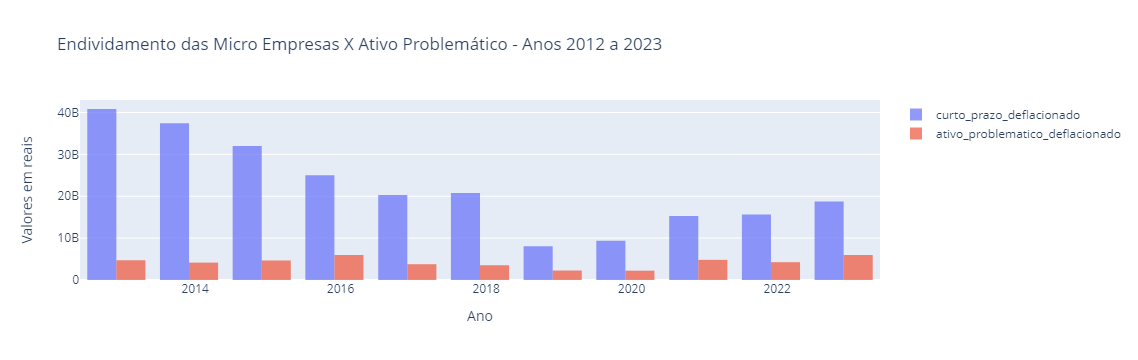

In [28]:
import plotly.graph_objects as go

# Criar a figura
fig = go.Figure()

# Adicionar as barras empilhadas
fig.add_trace(go.Bar(x=df_total_micro['data_base'], y=df_total_micro['curto_prazo_deflacionado'], name='curto_prazo_deflacionado'))
fig.add_trace(go.Bar(x=df_total_micro['data_base'], y=df_total_micro['ativo_problematico_deflacionado'], name='ativo_problematico_deflacionado'))

# Atualizar as configurações das barras para empilhamento
fig.update_traces(marker_line_width=0, opacity=0.7)

# Configurar o layout do gráfico
fig.update_layout(barmode='group', xaxis_title='Ano', yaxis_title='Valores em reais', title='Endividamento das Micro Empresas X Ativo Problemático - Anos 2012 a 2023')

# Mostrar o gráfico
fig.show()


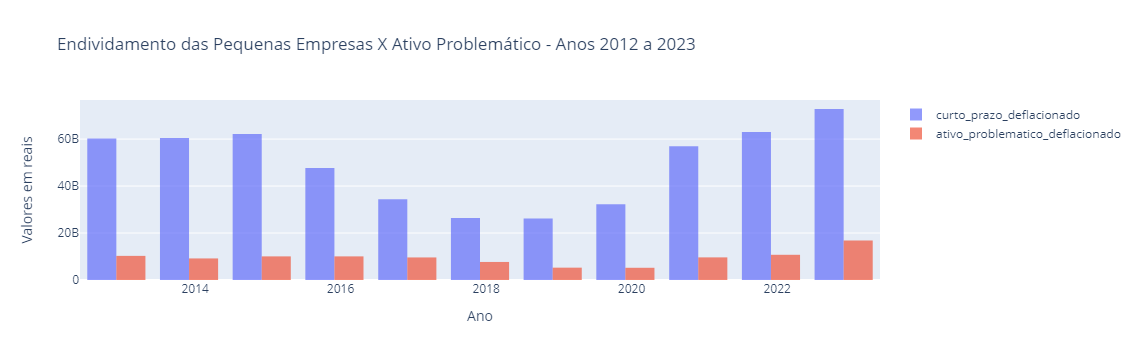

In [24]:
import plotly.graph_objects as go

# Criar a figura
fig = go.Figure()

# Adicionar as barras empilhadas
fig.add_trace(go.Bar(x=df_total_pequeno['data_base'], y=df_total_pequeno['curto_prazo_deflacionado'], name='curto_prazo_deflacionado'))
fig.add_trace(go.Bar(x=df_total_pequeno['data_base'], y=df_total_pequeno['ativo_problematico_deflacionado'], name='ativo_problematico_deflacionado'))

# Atualizar as configurações das barras para empilhamento
fig.update_traces(marker_line_width=0, opacity=0.7)

# Configurar o layout do gráfico
fig.update_layout(barmode='group', xaxis_title='Ano', yaxis_title='Valores em reais', title='Endividamento das Pequenas Empresas X Ativo Problemático - Anos 2012 a 2023')

# Mostrar o gráfico
fig.show()